### Решаем задачу загрузки фитса по известному HARP и в конкретный момент времени 

In [1]:
#Импортируем библиотеки, если не хватает чего-то, надо доустановить  (pip install или conda )
import time
import datetime
import urllib
from datetime import timedelta
import json
import urllib, requests
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

In [2]:
#Допустим нам известна дата и HARP номер: вот в таком виде
dateRaw = '2010-05-24 15:52:00'
HarpNum = 26

In [3]:
#Надо привести дату к jsoc формату и собрать урл. Если нужны какие-то ключи еще ключи,добавляем их в keys
evTime=datetime.datetime.strptime(dateRaw,'%Y-%m-%d %H:%M:%S')
dates=evTime.strftime('[%Y.%m.%d_%H:%M:%S_TAI]')
#собираем url
url = "http://jsoc.stanford.edu/cgi-bin/ajax/jsoc_info?ds=hmi.sharp_cea_720s[{}]{}&op=rs_list&key=&key=NOAA_ARS,USFLUX,MEANGAM,MEANGBT,MEANGBZ,MEANGBH,MEANJZD,TOTUSJZ,MEANALP,MEANJZH,TOTUSJH,ABSNJZH,SAVNCPP,MEANPOT,TOTPOT,MEANSHR,SHRGT45,R_VALUE,AREA_ACR&seg=magnetogram".format(str(HarpNum),dates)

In [4]:
response = requests.get(url)
data = response.json()
data

{'count': 1,
 'keywords': [{'name': 'NOAA_ARS', 'values': ['11072']},
  {'name': 'USFLUX', 'values': ['4.460852e+21']},
  {'name': 'MEANGAM', 'values': ['51.219']},
  {'name': 'MEANGBT', 'values': ['100.930']},
  {'name': 'MEANGBZ', 'values': ['105.805']},
  {'name': 'MEANGBH', 'values': ['63.201']},
  {'name': 'MEANJZD', 'values': ['0.17030634']},
  {'name': 'TOTUSJZ', 'values': ['4.902235e+12']},
  {'name': 'MEANALP', 'values': ['-0.01341808']},
  {'name': 'MEANJZH', 'values': ['-0.00851071']},
  {'name': 'TOTUSJH', 'values': ['286.715']},
  {'name': 'ABSNJZH', 'values': ['47.311']},
  {'name': 'SAVNCPP', 'values': ['1.572054e+12']},
  {'name': 'MEANPOT', 'values': ['1.397288e+04']},
  {'name': 'TOTPOT', 'values': ['1.031562e+23']},
  {'name': 'MEANSHR', 'values': ['42.124']},
  {'name': 'SHRGT45', 'values': ['45.134']},
  {'name': 'R_VALUE', 'values': ['2.148']},
  {'name': 'AREA_ACR', 'values': ['318.630341']}],
 'links': [],
 'runtime': 0.106,
 'segments': [{'bscales': ['0.1'],
  

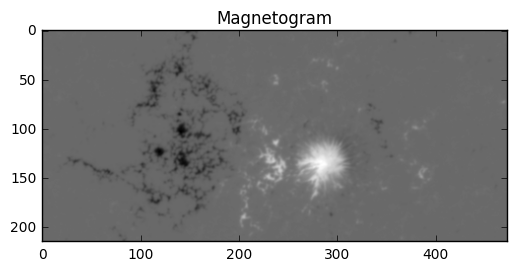

In [5]:
#Если не надо сохранять на диск:
url_download = "http://jsoc.stanford.edu"+data['segments'][0]['values'][0]
mag = fits.open(url_download)
mag[1].verify("silentfix")
fits_data1 =  mag[1].data
plt.imshow(fits_data1,cmap = plt.get_cmap('gray')); plt.title('Magnetogram') 

In [6]:
#Если надо сохранять, сохраняем, вместо текущей директории (os.getcwd()) подставляем какую надо
import os
filepath = os.getcwd()+'/hmi.sharp_cea_720s.{}.{}.magnetogram.fits'.format(str(HarpNum),dates)
urllib.request.urlretrieve(url_download,filepath)

('/Users/Irisha1/PycharmProjects/InteractiveJupiter/SDO processing/FitsProcessing/hmi.sharp_cea_720s.26.[2010.05.24_15:52:00_TAI].magnetogram.fits',
 <http.client.HTTPMessage at 0x10ff71e48>)

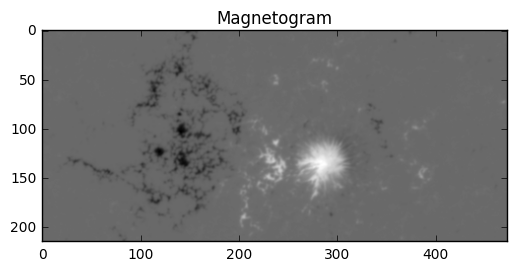

In [7]:
#Потом из директории загружаем и делаем, что хотим
hdulist = fits.open(filepath)
mag[1].verify("silentfix")
fits_data1 =  mag[1].data
plt.imshow(fits_data1,cmap = plt.get_cmap('gray')); plt.title('Magnetogram')